<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_Motorizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# **Automoviles personales por cápita.** Indicador nº 79 de la ISO-37120:

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos del numero de automoviles por capita de Barcelona a nivel de barrio facilitadas por la Oficina Municipal de Dades - Departament d'Estadística i Difusió de Dades. Ajuntament de Barcelona. a traves del portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/data/es/dataset/est_vehicles_index_motor).

## Carga del conjunto de datos


Cargamos en un dataframe los csv obtenidos desde el año 2006 hasta 2019 sobre la esperanza de vida en la ciudad de Barcelona

In [1]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [3]:
# Directorio del indicador 1
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Transporte/Indicador_79_Automoviles/'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [4]:
# Mostramos las primeras filas del dataframe
df_final.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Tipus_Vehicle,Index_Motoritzacio
0,2021,1,Ciutat Vella,1,el Raval,1,Turismes,257.82
1,2021,1,Ciutat Vella,1,el Raval,2,Turismes,119.54
2,2021,1,Ciutat Vella,1,el Raval,3,Turismes,107.35
3,2021,1,Ciutat Vella,1,el Raval,4,Turismes,153.43
4,2021,1,Ciutat Vella,1,el Raval,5,Turismes,122.55


In [5]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19224 entries, 0 to 19223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Any                 19224 non-null  int64  
 1   Codi_Districte      19224 non-null  int64  
 2   Nom_Districte       19224 non-null  object 
 3   Codi_Barri          19224 non-null  int64  
 4   Nom_Barri           19224 non-null  object 
 5   Seccio_Censal       19224 non-null  int64  
 6   Tipus_Vehicle       19224 non-null  object 
 7   Index_Motoritzacio  19224 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.2+ MB


El dataset se compone de un total de 9 columnas:
*   **Any:** Año del dato   
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Seccio_Censal:** Sección censal de Barcelona
*   **Tipus_Vehicle:** Tipo de vehiculo registrado
*   **Index_Motoritzacio:** Índice de motorización del parque de vehículos de la ciudad de Barcelona

El dataset tiene un total de 19223 filas y no tiene missing-values


In [6]:
# Analizamos las variables numericas
df_final.describe()

,Any,Codi_Districte,Codi_Barri,Seccio_Censal,Index_Motoritzacio
count,19224.000000,19224.000000,19224.000000,19224.000000,19224.000000
mean,2020.000000,5.723783,33.246255,60.645131,84.084614
std,0.816518,2.937233,21.883306,41.551155,129.282711
min,2019.000000,1.000000,1.000000,1.000000,0.000000
25%,2019.000000,3.000000,13.000000,27.750000,7.740000
50%,2020.000000,6.000000,31.000000,54.000000,22.910000
75%,2021.000000,8.000000,52.000000,87.000000,122.472500
max,2021.000000,10.000000,73.000000,237.000000,3241.030000


Analizando cada una de las variables numericas vemos que la variable:

*   **Any:** es integra y contiene la información correcta
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos.
*   **Codi_Barri:** aunque es una variable numerica corresponde con valores categoricos.
*   **Seccio_Censal:** aunque es una variable numerica corresponde con valores categoricos.
*   **Index_Motoritzacio:** es integra y contiene la información correcta.


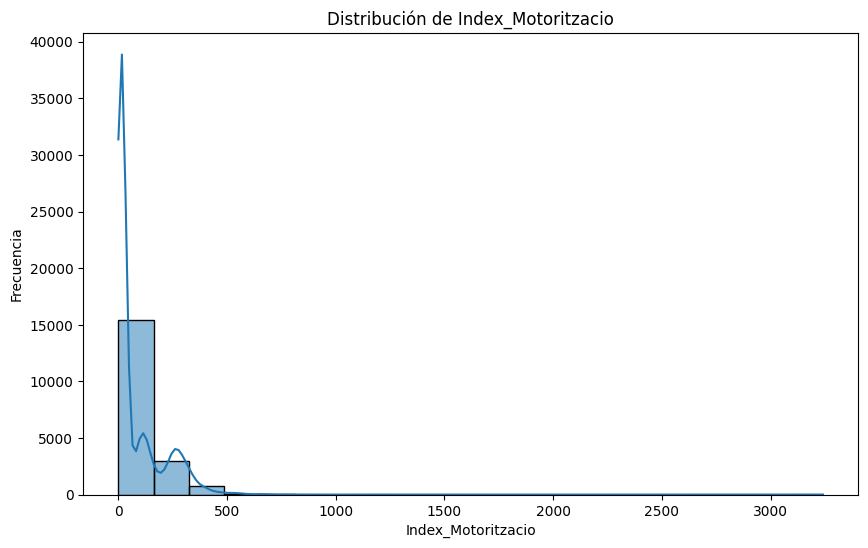

In [7]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Index_Motoritzacio'], bins=20, kde=True)
plt.title('Distribución de Index_Motoritzacio')
plt.xlabel('Index_Motoritzacio')
plt.ylabel('Frecuencia')
plt.show()

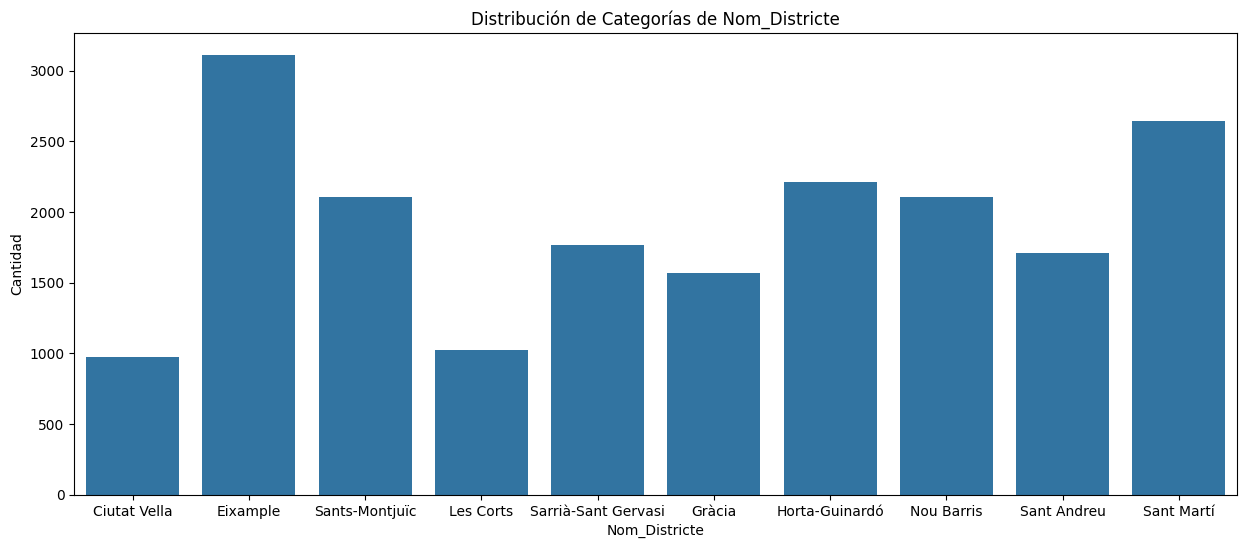

In [8]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Nom_Districte', data=df_final)
plt.title('Distribución de Categorías de Nom_Districte')
plt.xlabel('Nom_Districte')
plt.ylabel('Cantidad')
plt.show()

Las diferencias entre cantidad entre distritos corresponde a la cantidad de barrios que contiene cada distrito y sus secciones censales.

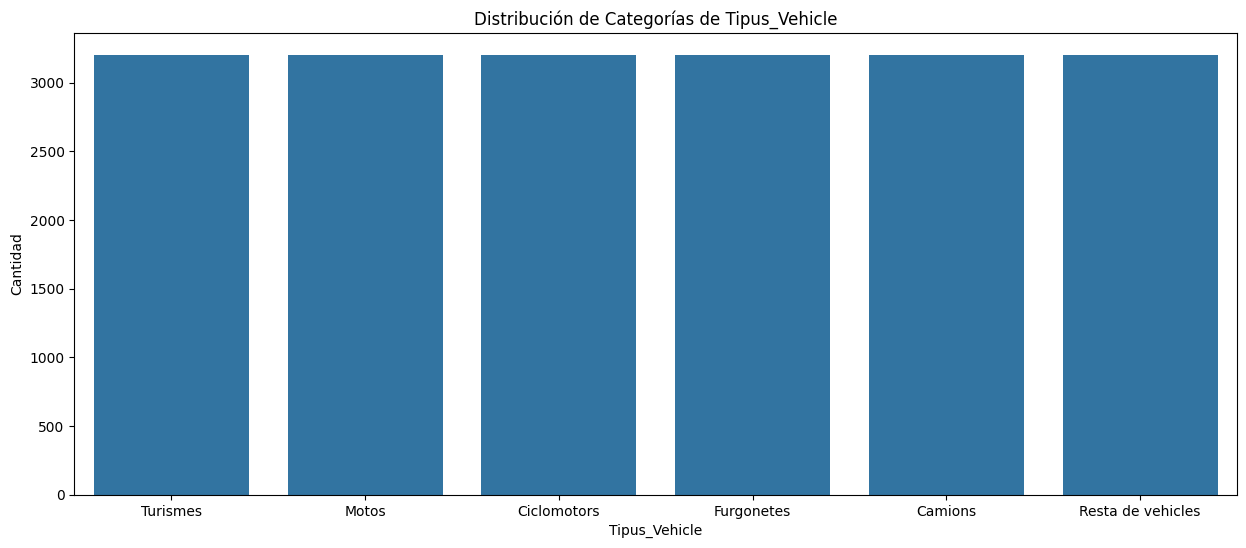

In [10]:
# Visualizamos la distribución de la variable categórica Tipus_Vehicle utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Tipus_Vehicle', data=df_final)
plt.title('Distribución de Categorías de Tipus_Vehicle')
plt.xlabel('Tipus_Vehicle')
plt.ylabel('Cantidad')
plt.show()

La variable categorica distingue entre 6 tipos de vehiculos:

*   Turismos (Turismes)
*   Motos
*   Ciclomotores (Ciclomotors)
*   Furgonetas (Furgonetes)
*   Camines (Camions)
*   Otros vehiculos (Resta de vehicles)

## Limpieza de datos

Verificamos que si hay datos faltantes

In [11]:
df_final.isnull().sum()

Any                   0
Codi_Districte        0
Nom_Districte         0
Codi_Barri            0
Nom_Barri             0
Seccio_Censal         0
Tipus_Vehicle         0
Index_Motoritzacio    0
dtype: int64

Observamos que no hay datos faltantes propiamente dichos, pero aun asi debemos centrarnos en las siguientes problematicas que estan directamente ligadas con la limpieza de datos:
1. Aislar en 6 variables distintas la variable continua "Index_motoritzacio".
2. Agrupar los datos por barrio, eliminando la varible categorica sección censal.


### Aislar en 6 variables la varibale continua "Index_motorització"

In [16]:
# Filtrar el dataFrame por Turismes
df_turismes = df_final[(df_final['Tipus_Vehicle'] == "Turismes")]

# Modificamos nombre de la variable valor
df_turismes = df_turismes.rename(columns={'Index_Motoritzacio': 'Index_Turisme'})

# Modificamos nombre de la variable valor
df_turismes = df_turismes.drop(columns=['Tipus_Vehicle'])

df_turismes.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Index_Turisme
0,2021,1,Ciutat Vella,1,el Raval,1,257.82
1,2021,1,Ciutat Vella,1,el Raval,2,119.54
2,2021,1,Ciutat Vella,1,el Raval,3,107.35
3,2021,1,Ciutat Vella,1,el Raval,4,153.43
4,2021,1,Ciutat Vella,1,el Raval,5,122.55


In [17]:
# Filtrar el dataFrame por Motos
df_motos = df_final[(df_final['Tipus_Vehicle'] == "Motos")]

# Modificamos nombre de la variable valor
df_motos = df_motos.rename(columns={'Index_Motoritzacio': 'Index_Motos'})

# Modificamos nombre de la variable valor
df_motos = df_motos.drop(columns=['Tipus_Vehicle'])

df_motos.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Index_Motos
1068,2021,1,Ciutat Vella,1,el Raval,1,97.64
1069,2021,1,Ciutat Vella,1,el Raval,2,83.28
1070,2021,1,Ciutat Vella,1,el Raval,3,51.08
1071,2021,1,Ciutat Vella,1,el Raval,4,78.06
1072,2021,1,Ciutat Vella,1,el Raval,5,78.43


In [18]:
# Filtrar el dataFrame por Ciclomotors
df_ciclomotors = df_final[(df_final['Tipus_Vehicle'] == "Ciclomotors")]

# Modificamos nombre de la variable valor
df_ciclomotors = df_ciclomotors.rename(columns={'Index_Motoritzacio': 'Index_Ciclomotors'})

# Modificamos nombre de la variable valor
df_ciclomotors = df_ciclomotors.drop(columns=['Tipus_Vehicle'])

df_ciclomotors.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Index_Ciclomotors
2136,2021,1,Ciutat Vella,1,el Raval,1,520.21
2137,2021,1,Ciutat Vella,1,el Raval,2,34.25
2138,2021,1,Ciutat Vella,1,el Raval,3,19.94
2139,2021,1,Ciutat Vella,1,el Raval,4,29.61
2140,2021,1,Ciutat Vella,1,el Raval,5,33.09


In [19]:
# Filtrar el dataFrame por Furgonetes
df_furgonetes = df_final[(df_final['Tipus_Vehicle'] == "Furgonetes")]

# Modificamos nombre de la variable valor
df_furgonetes = df_furgonetes.rename(columns={'Index_Motoritzacio': 'Index_Furgonetes'})

# Modificamos nombre de la variable valor
df_furgonetes = df_furgonetes.drop(columns=['Tipus_Vehicle'])

df_furgonetes.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Index_Furgonetes
3204,2021,1,Ciutat Vella,1,el Raval,1,38.90
3205,2021,1,Ciutat Vella,1,el Raval,2,20.15
3206,2021,1,Ciutat Vella,1,el Raval,3,10.38
3207,2021,1,Ciutat Vella,1,el Raval,4,16.15
3208,2021,1,Ciutat Vella,1,el Raval,5,19.20


In [20]:
# Filtrar el dataFrame por Camions
df_camions = df_final[(df_final['Tipus_Vehicle'] == "Camions")]

# Modificamos nombre de la variable valor
df_camions = df_camions.rename(columns={'Index_Motoritzacio': 'Index_Camions'})

# Modificamos nombre de la variable valor
df_camions = df_camions.drop(columns=['Tipus_Vehicle'])

df_camions.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Index_Camions
4272,2021,1,Ciutat Vella,1,el Raval,1,17.54
4273,2021,1,Ciutat Vella,1,el Raval,2,5.37
4274,2021,1,Ciutat Vella,1,el Raval,3,13.38
4275,2021,1,Ciutat Vella,1,el Raval,4,6.06
4276,2021,1,Ciutat Vella,1,el Raval,5,6.13


In [21]:
# Filtrar el dataFrame por Resta de vehicles
df_resta = df_final[(df_final['Tipus_Vehicle'] == "Resta de vehicles")]

# Modificamos nombre de la variable valor
df_resta = df_resta.rename(columns={'Index_Motoritzacio': 'Index_Resta'})

# Modificamos nombre de la variable valor
df_resta = df_resta.drop(columns=['Tipus_Vehicle'])

df_resta.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Index_Resta
5340,2021,1,Ciutat Vella,1,el Raval,1,57.97
5341,2021,1,Ciutat Vella,1,el Raval,2,4.70
5342,2021,1,Ciutat Vella,1,el Raval,3,1.37
5343,2021,1,Ciutat Vella,1,el Raval,4,2.02
5344,2021,1,Ciutat Vella,1,el Raval,5,2.86


In [31]:
# Realizar la unión de los DataFrames por múltiples claves
df_filtrado = pd.merge(df_turismes, df_motos, how='left')
df_filtrado = pd.merge(df_filtrado, df_ciclomotors, how='left')
df_filtrado = pd.merge(df_filtrado, df_furgonetes, how='left')
df_filtrado = pd.merge(df_filtrado, df_camions, how='left')
df_filtrado = pd.merge(df_filtrado, df_resta, how='left')
# Mostrar el resultado del filtrado
df_filtrado.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta
0,2021,1,Ciutat Vella,1,el Raval,1,257.82,97.64,520.21,38.90,17.54,57.97
1,2021,1,Ciutat Vella,1,el Raval,2,119.54,83.28,34.25,20.15,5.37,4.70
2,2021,1,Ciutat Vella,1,el Raval,3,107.35,51.08,19.94,10.38,13.38,1.37
3,2021,1,Ciutat Vella,1,el Raval,4,153.43,78.06,29.61,16.15,6.06,2.02
4,2021,1,Ciutat Vella,1,el Raval,5,122.55,78.43,33.09,19.20,6.13,2.86


In [32]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Any                3204 non-null   int64  
 1   Codi_Districte     3204 non-null   int64  
 2   Nom_Districte      3204 non-null   object 
 3   Codi_Barri         3204 non-null   int64  
 4   Nom_Barri          3204 non-null   object 
 5   Seccio_Censal      3204 non-null   int64  
 6   Index_Turisme      3204 non-null   float64
 7   Index_Motos        3204 non-null   float64
 8   Index_Ciclomotors  3204 non-null   float64
 9   Index_Furgonetes   3204 non-null   float64
 10  Index_Camions      3204 non-null   float64
 11  Index_Resta        3204 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 300.5+ KB


### Agrupar los datos por barrio, eliminando la varible categorica sección censal.

Por tal de seguir con la misma estructura de datos que los anteriores indicadores, agruparemos los datos por Barrio

In [33]:
# Obtenemos un dataframe sin la variable Seccio_Censal
df_noSeccio=df_filtrado[['Any','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri','Index_Turisme','Index_Motos','Index_Ciclomotors','Index_Furgonetes','Index_Camions','Index_Resta']]
df_noSeccio.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta
0,2021,1,Ciutat Vella,1,el Raval,257.82,97.64,520.21,38.90,17.54,57.97
1,2021,1,Ciutat Vella,1,el Raval,119.54,83.28,34.25,20.15,5.37,4.70
2,2021,1,Ciutat Vella,1,el Raval,107.35,51.08,19.94,10.38,13.38,1.37
3,2021,1,Ciutat Vella,1,el Raval,153.43,78.06,29.61,16.15,6.06,2.02
4,2021,1,Ciutat Vella,1,el Raval,122.55,78.43,33.09,19.20,6.13,2.86


In [36]:
# Agrupamos los datos por Any, Codi_Districte, Nom_Districte, Codi_Barri y Nom_Barri
df_indexAgrup = df_noSeccio.groupby(['Any','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri'])

# Sumamos las variables continuas ParadosReg y NoParados
df_indexAgrup=df_indexAgrup[['Index_Turisme','Index_Motos','Index_Ciclomotors','Index_Furgonetes','Index_Camions','Index_Resta']].mean()

print("Primeras filas del DataFrame:")
df_indexAgrup.head()

Primeras filas del DataFrame:


Index_Turisme  \
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                              
2019 1              Ciutat Vella  1          el Raval                                  122.718571   
                                  2          el Gòtic                                  334.384444   
                                  3          la Barceloneta                            208.480909   
                                  4          Sant Pere, Santa Caterina i la Ribera     167.408462   
     2              Eixample      5          el Fort Pienc                             277.481000   

                                                                                    Index_Motos  \
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                            
2019 1              Ciutat Vella  1          el Raval                                 64.096190   
                                  2          el Gòtic                                212.484444   
                                  3          la Barceloneta                          117.584545   
                                  4          Sant Pere, Santa Caterina i la Ribera   110.965385   
     2              Eixample      5          el Fort Pienc                           124.800000   

                                                                                    Index_Ciclomotors  \
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                                  
2019 1              Ciutat Vella  1          el Raval                                       27.518571   
                                  2          el Gòtic                                       29.957778   
                                  3          la Barceloneta                                 33.890000   
                                  4          Sant Pere, Santa Caterina i la Ribera         231.558462   
     2              Eixample      5          el Fort Pienc                                  25.181500   

                                                                                    Index_Furgonetes  \
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                                 
2019 1              Ciutat Vella  1          el Raval                                      18.271905   
                                  2          el Gòtic                                     101.367778   
                                  3          la Barceloneta                                29.419091   
                                  4          Sant Pere, Santa Caterina i la Ribera         22.277692   
     2              Eixample      5          el Fort Pienc                                 22.122500   

                                                                                    Index_Camions  \
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                              
2019 1              Ciutat Vella  1          el Raval                                    6.926667   
                                  2          el Gòtic                                   66.910000   
                                  3          la Barceloneta                              6.974545   
                                  4          Sant Pere, Santa Caterina i la Ribera       5.622308   
     2              Eixample      5          el Fort Pienc                               8.354000   

                                                                                    Index_Resta  
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                           
2019 1              Ciutat Vella  1          el Raval                                  4.759048  
                                  2          el Gòtic                                 26.407778  
                                  3          la Barceloneta                            5.944545  
                   

In [37]:
# Reseteamos indices sobre el dataframe agrupado
df_indexAgrup = df_indexAgrup.reset_index()

## Creación de .csv

Obtenemos el archivo datosParo.csv con los datos del dataframe resultante

In [38]:
# Guardar el DataFrame en un archivo CSV
df_indexAgrup.to_csv('datosIndeceMotorizacion.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua Indice de Motorizacion de los turismos (Index_Turisme)

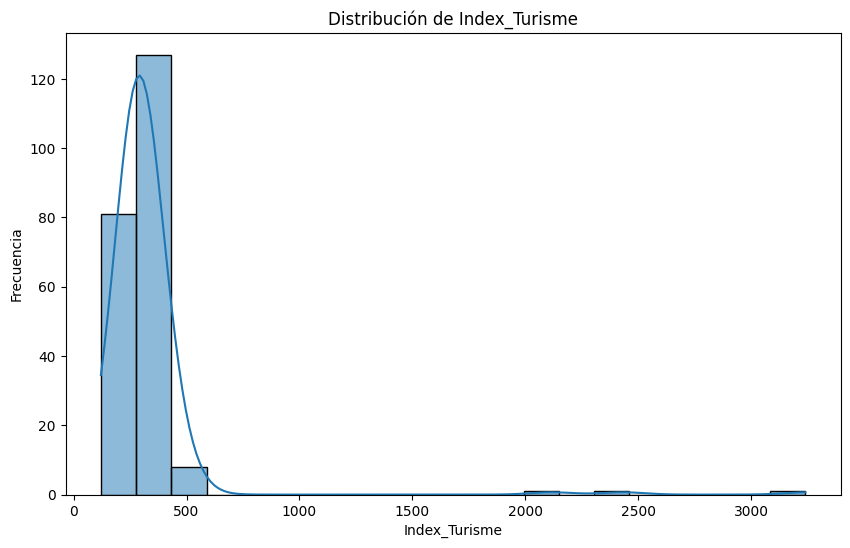

In [39]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_indexAgrup['Index_Turisme'], bins=20, kde=True)
plt.title('Distribución de Index_Turisme')
plt.xlabel('Index_Turisme')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
# Agrupamos la variable continua Index_Turisme en función de los años
df_anyTurismes = df_indexAgrup.groupby(['Any','Codi_Districte','Nom_Districte'])['Index_Turisme'].mean().reset_index()

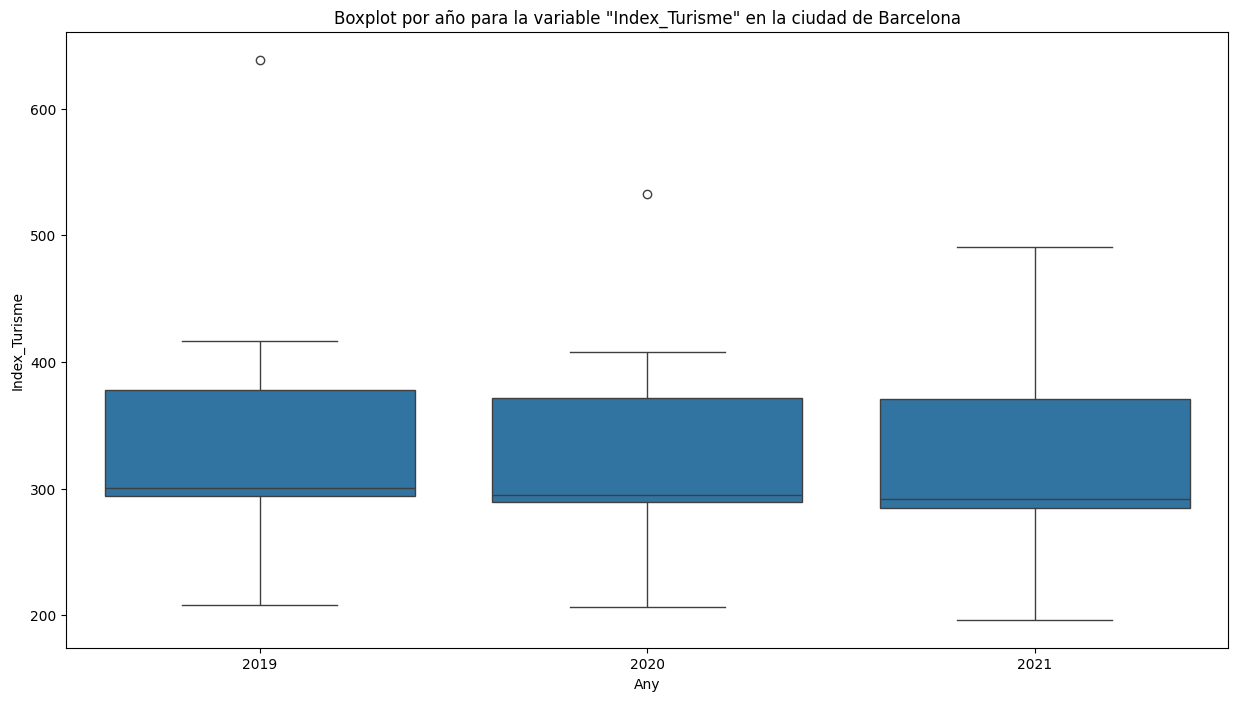

In [42]:
# Crear diagrama de caja para la variable continua "ParadosReg" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Index_Turisme', data=df_anyTurismes)
plt.title('Boxplot por año para la variable "Index_Turisme" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

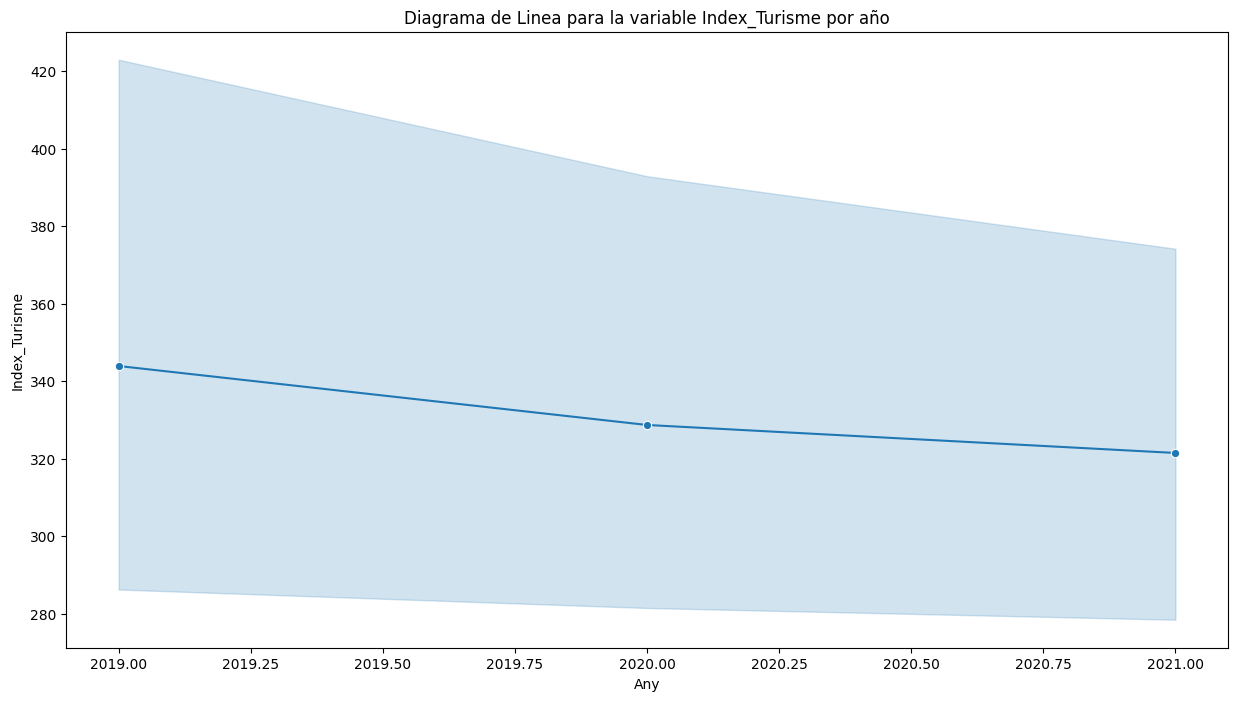

In [43]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_anyTurismes, x='Any', y='Index_Turisme', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Index_Turisme por año')
plt.xlabel('Any')
plt.ylabel('Index_Turisme')

plt.show()

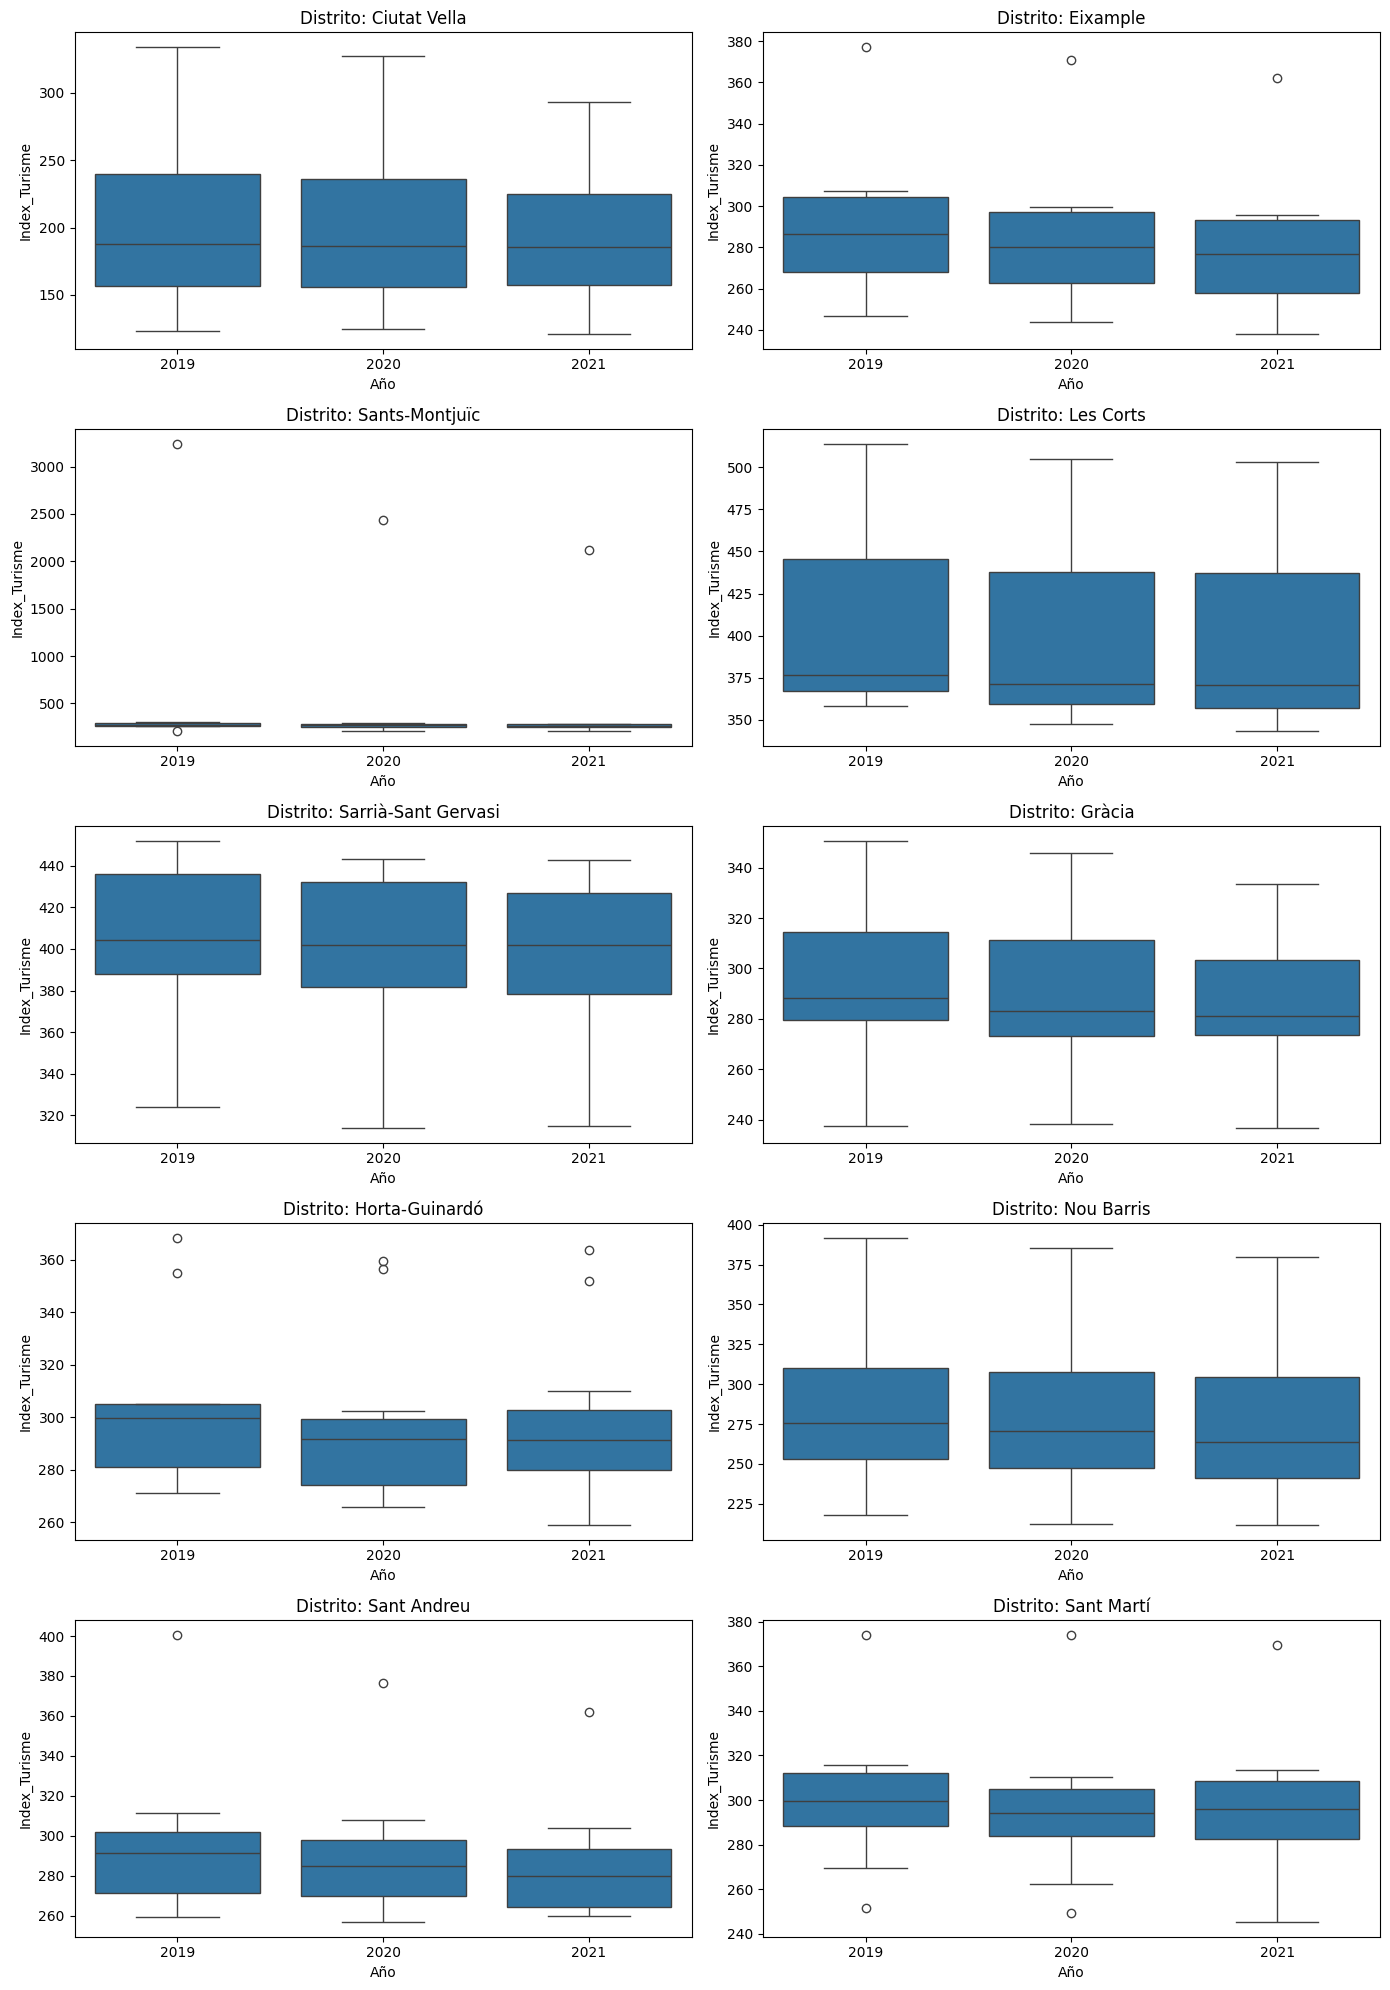

In [46]:
# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(14,20))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_indexAgrup['Nom_Districte'].unique(), start=1):
    plt.subplot(5, 2, i)
    subset = df_indexAgrup[df_indexAgrup['Nom_Districte'] == category]

    # Crear un boxplot para cada subconjunto de datos
    sns.boxplot(x='Any', y='Index_Turisme', data=subset, ax=plt.gca())
    plt.title(f'Distrito: {category}')
    plt.xlabel('Año')
    plt.ylabel('Index_Turisme')

plt.tight_layout()
plt.show()

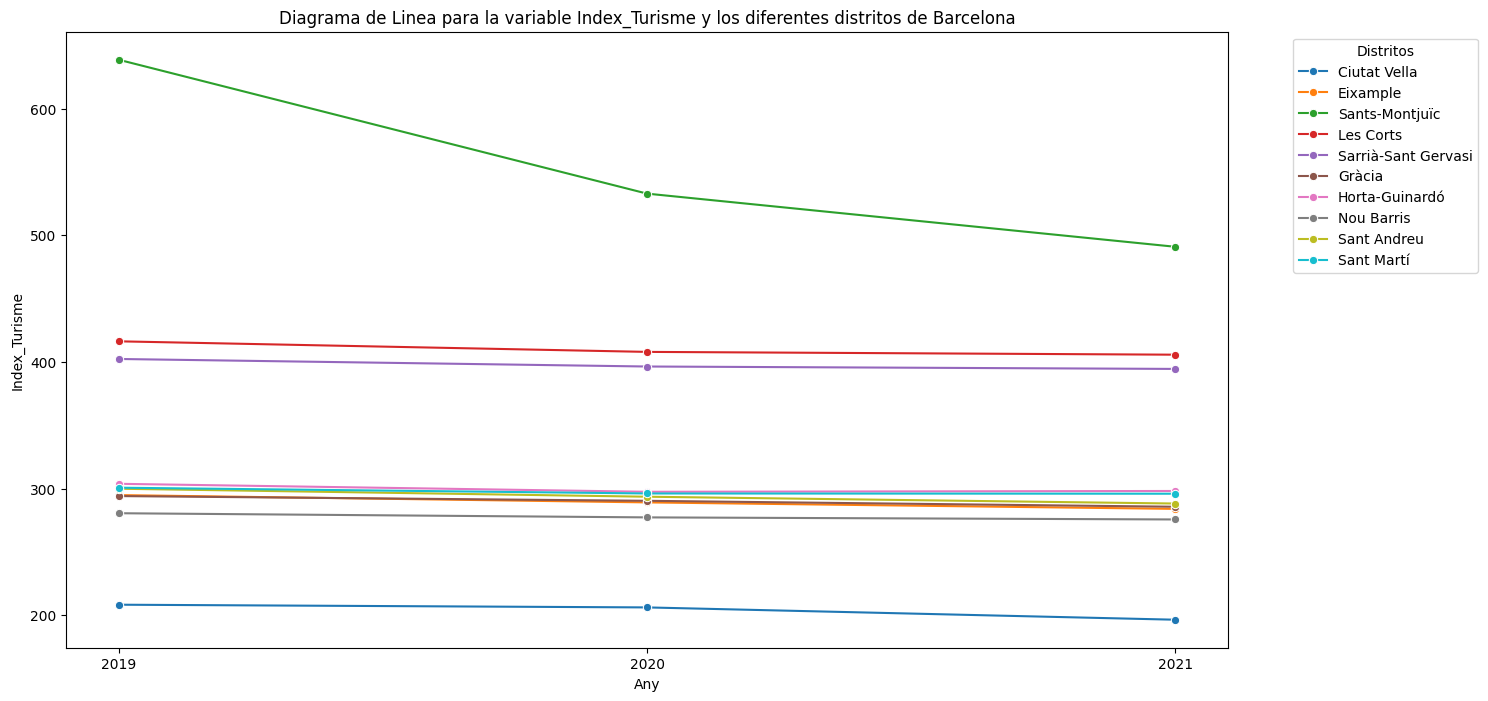

In [48]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

#Sumamos los parados por distrito
summarized_data = df_indexAgrup.groupby(['Any','Codi_Districte','Nom_Districte'])['Index_Turisme'].mean().reset_index()


sns.lineplot(data=summarized_data, x='Any', y='Index_Turisme', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Index_Turisme y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Index_Turisme')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_indexAgrup['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

### Variable continua Indice de Motorizacion de Motos (Index_Motos)

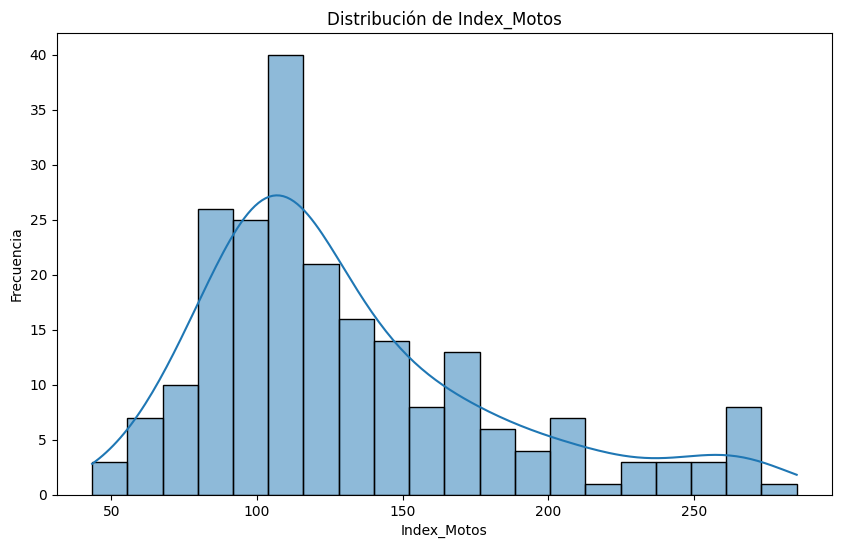

In [53]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_indexAgrup['Index_Motos'], bins=20, kde=True)
plt.title('Distribución de Index_Motos')
plt.xlabel('Index_Motos')
plt.ylabel('Frecuencia')
plt.show()

In [54]:
# Agrupamos la variable continua Index_Motos en función de los años
df_anyMotos = df_indexAgrup.groupby(['Any','Codi_Districte','Nom_Districte'])['Index_Motos'].mean().reset_index()

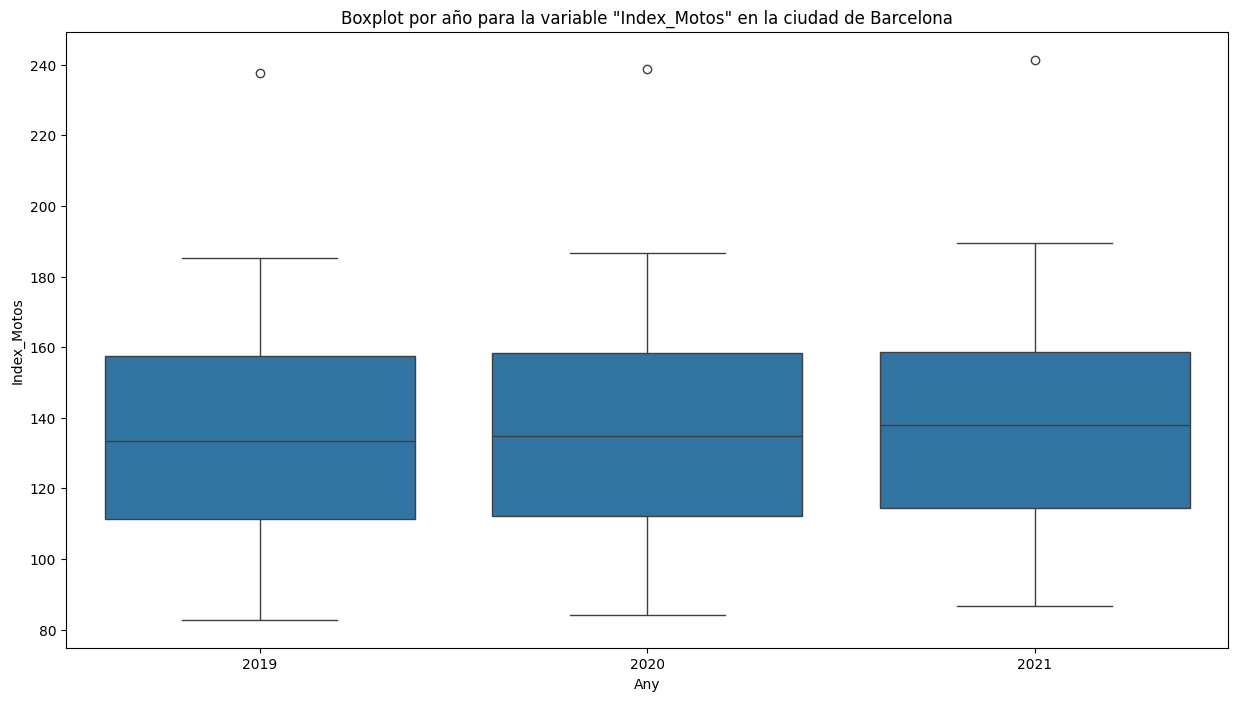

In [55]:
# Crear diagrama de caja para la variable continua "ParadosReg" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Index_Motos', data=df_anyMotos)
plt.title('Boxplot por año para la variable "Index_Motos" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

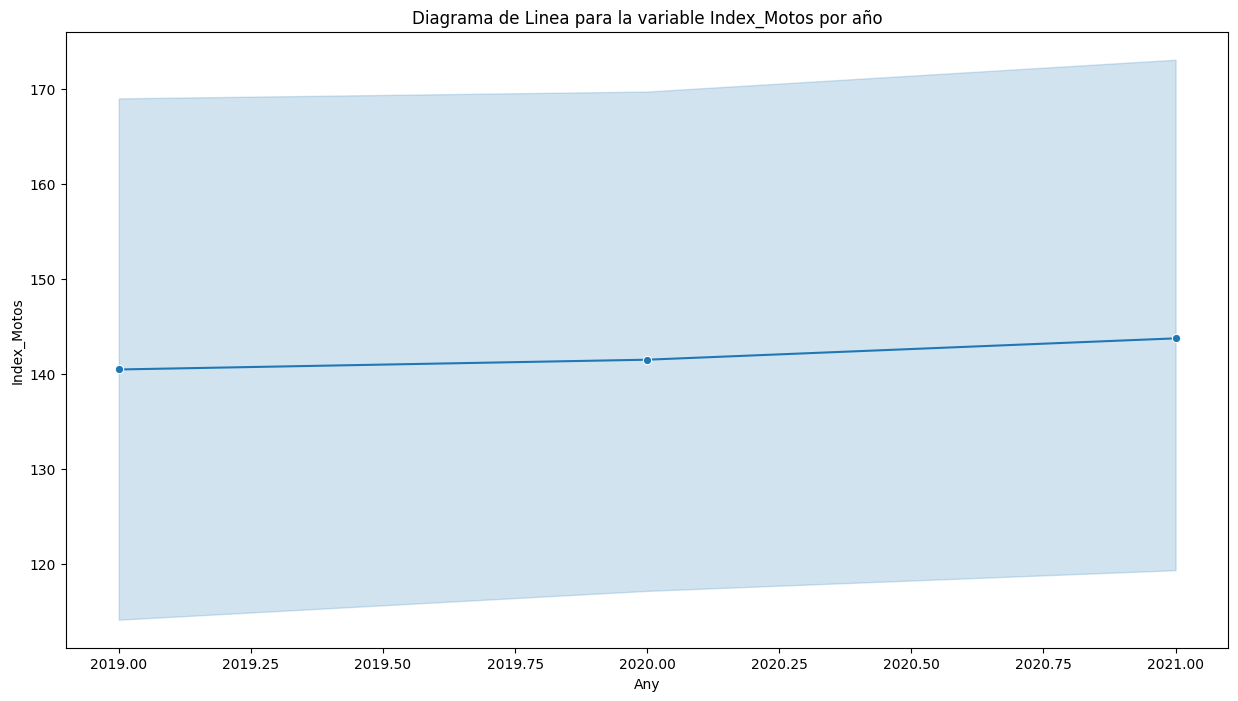

In [56]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_anyMotos, x='Any', y='Index_Motos', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Index_Motos por año')
plt.xlabel('Any')
plt.ylabel('Index_Motos')

plt.show()

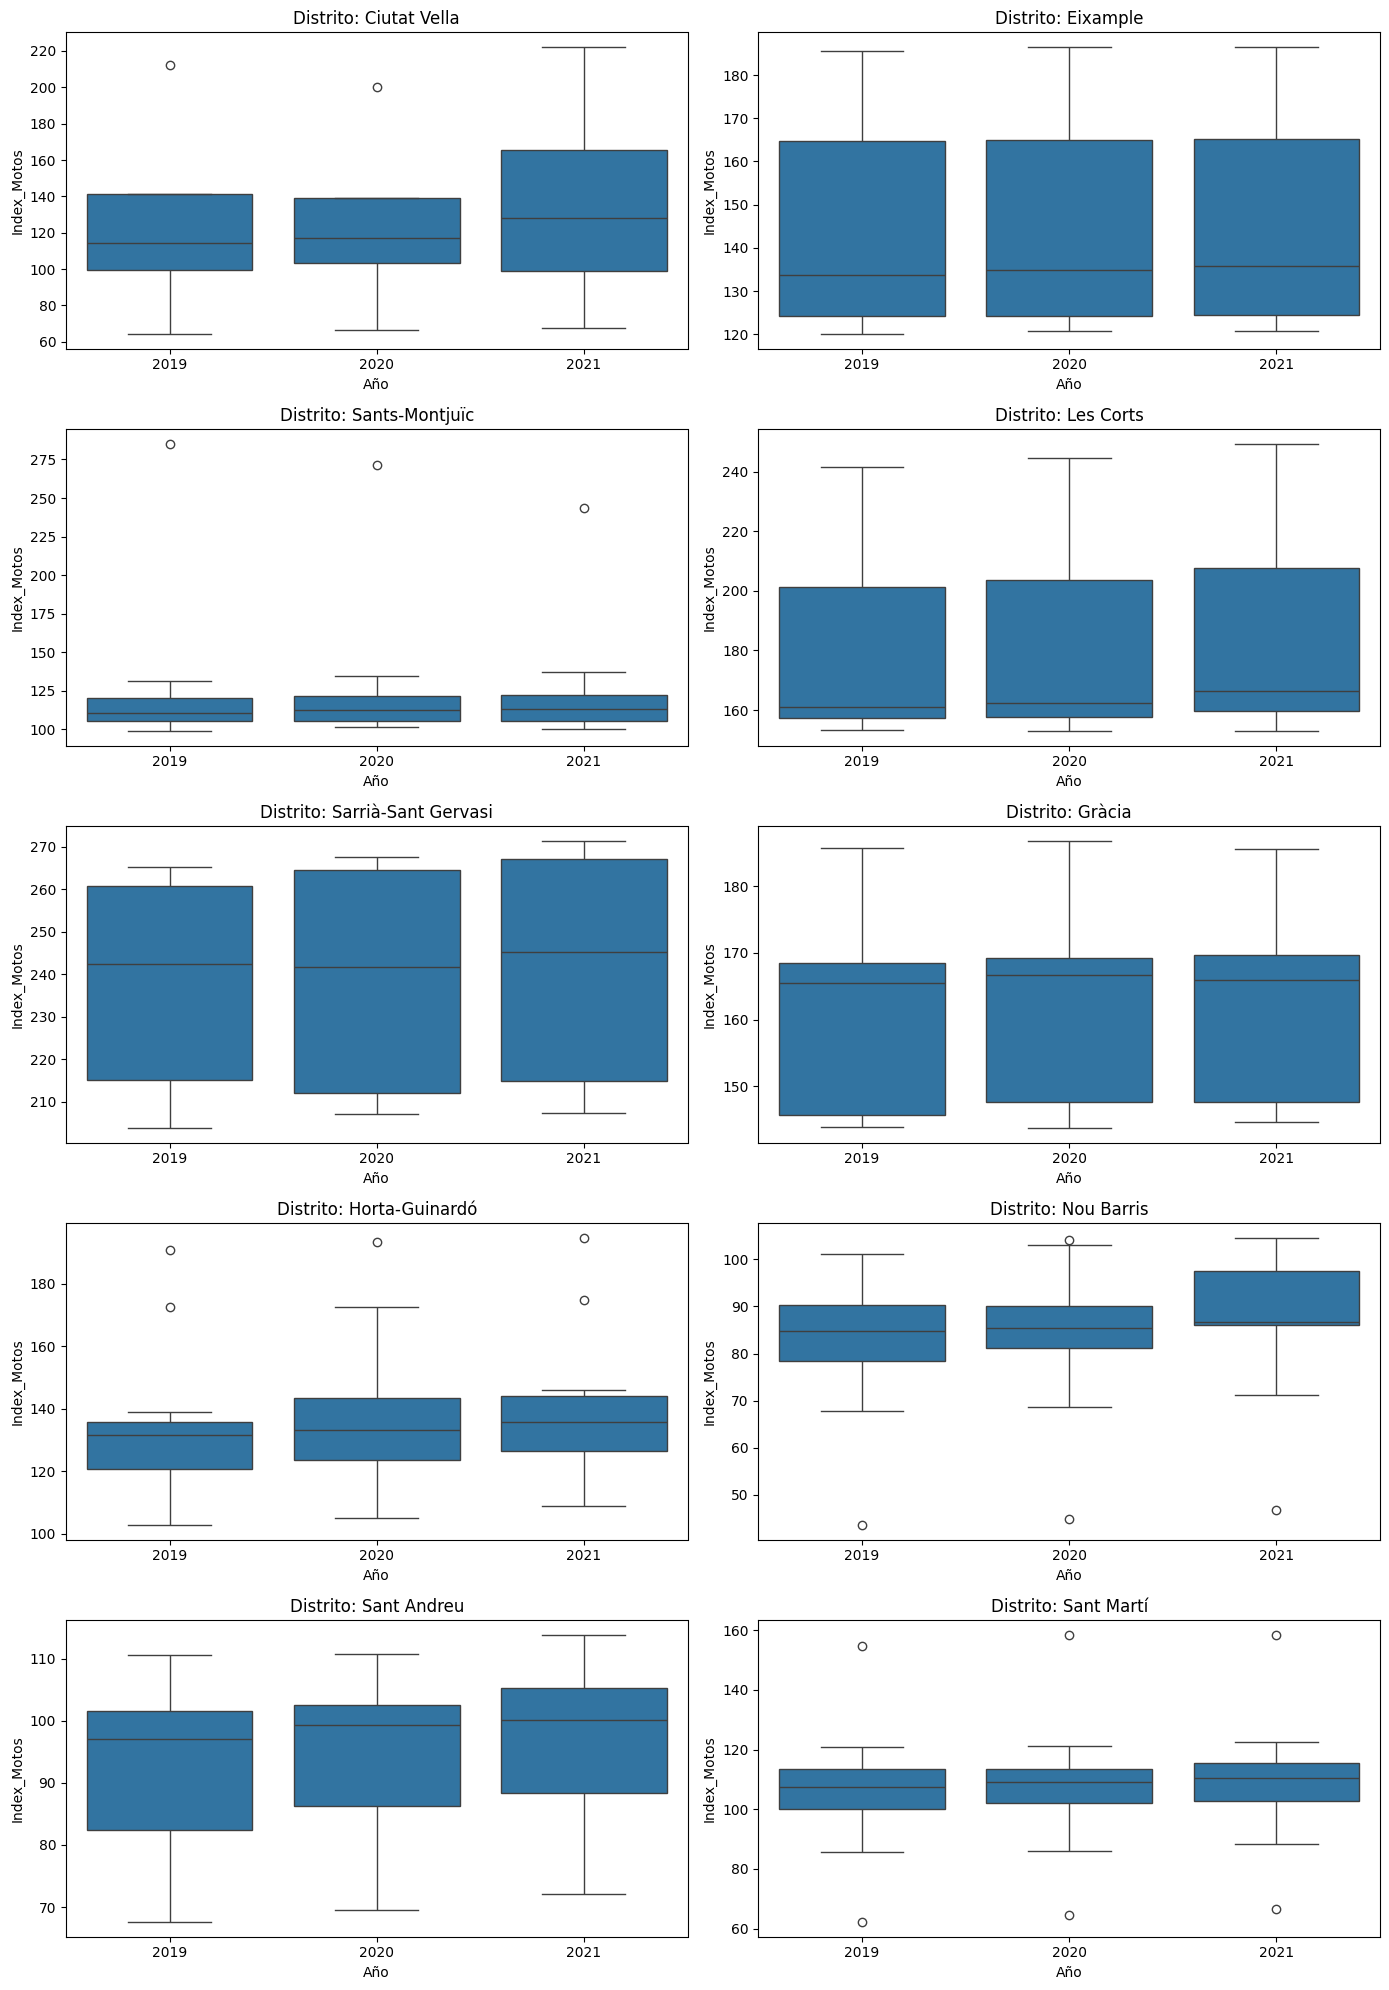

In [57]:
# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(14,20))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_indexAgrup['Nom_Districte'].unique(), start=1):
    plt.subplot(5, 2, i)
    subset = df_indexAgrup[df_indexAgrup['Nom_Districte'] == category]

    # Crear un boxplot para cada subconjunto de datos
    sns.boxplot(x='Any', y='Index_Motos', data=subset, ax=plt.gca())
    plt.title(f'Distrito: {category}')
    plt.xlabel('Año')
    plt.ylabel('Index_Motos')

plt.tight_layout()
plt.show()

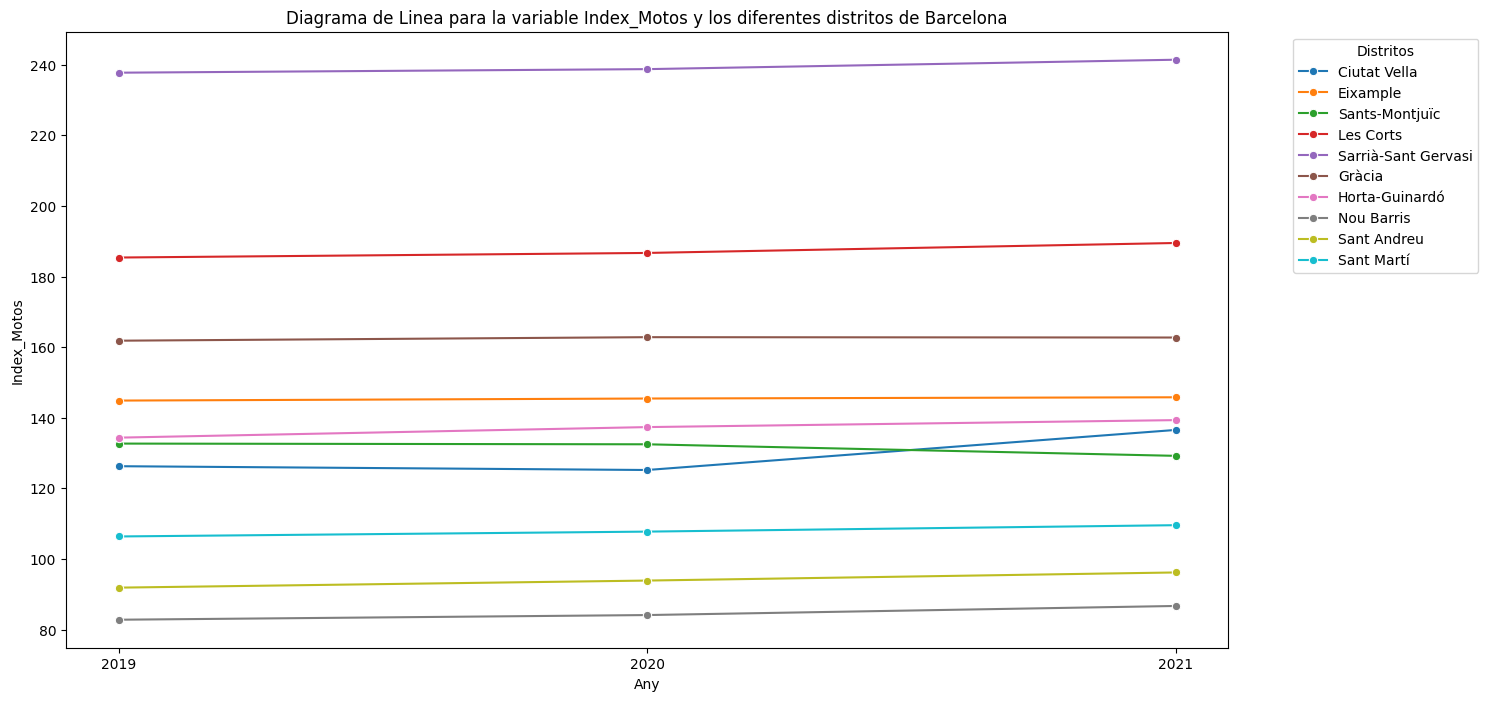

In [58]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_anyMotos, x='Any', y='Index_Motos', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Index_Motos y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Index_Motos')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_indexAgrup['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

### Variable continua Indice de Motorizacion de Furgonetas (Index_Furgonetes)


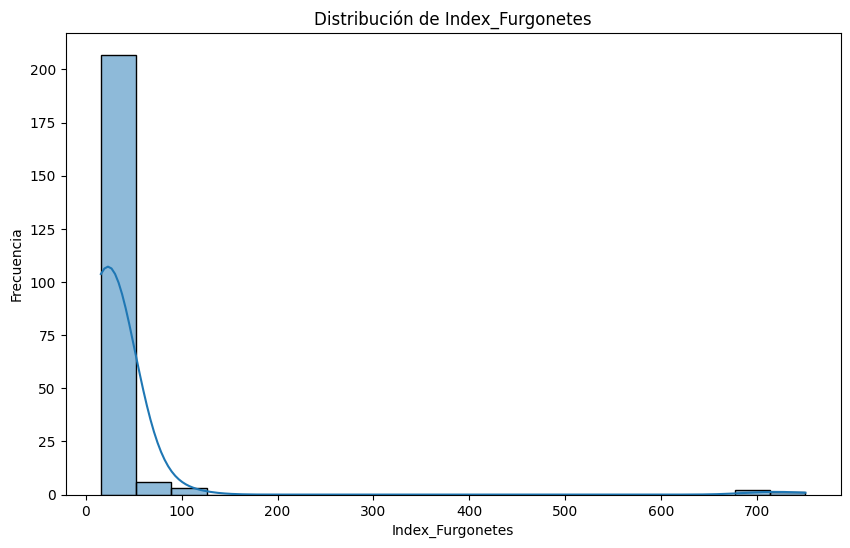

In [60]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_indexAgrup['Index_Furgonetes'], bins=20, kde=True)
plt.title('Distribución de Index_Furgonetes')
plt.xlabel('Index_Furgonetes')
plt.ylabel('Frecuencia')
plt.show()

In [61]:
# Agrupamos la variable continua Index_Furgonetes en función de los años
df_anyFurgonetes = df_indexAgrup.groupby(['Any','Codi_Districte','Nom_Districte'])['Index_Furgonetes'].mean().reset_index()

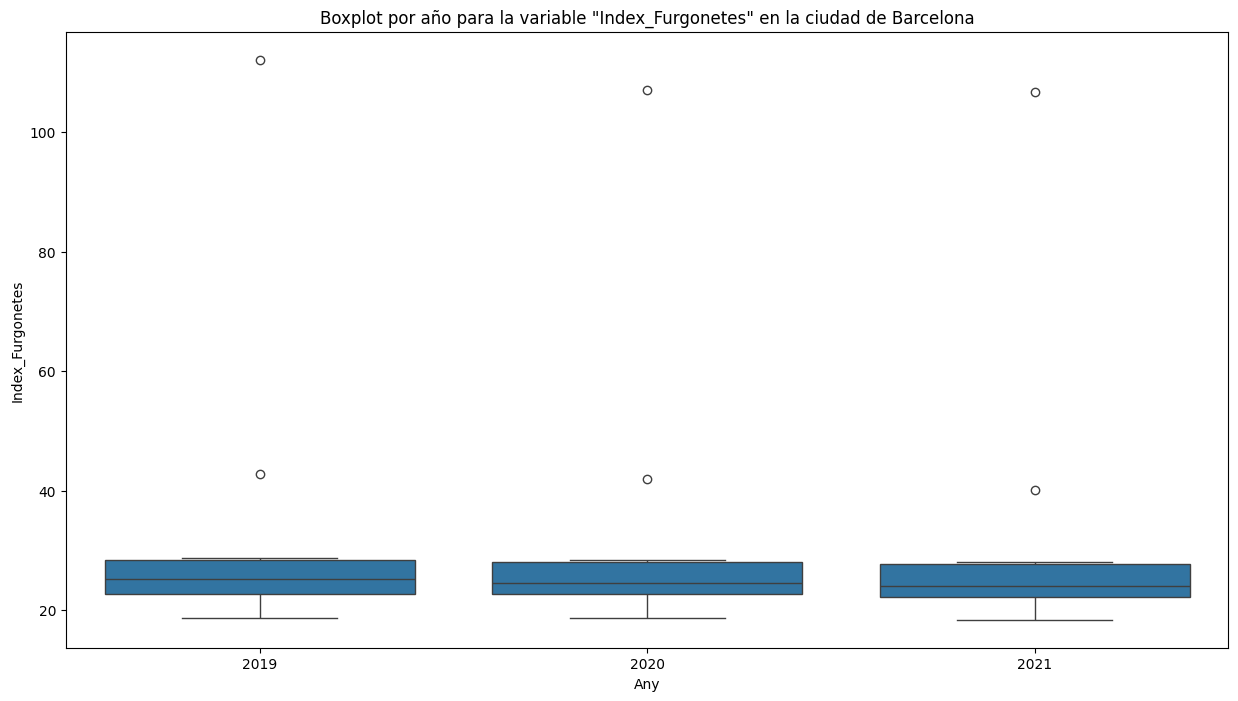

In [62]:
# Crear diagrama de caja para la variable continua "Index_Furgonetes" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Index_Furgonetes', data=df_anyFurgonetes)
plt.title('Boxplot por año para la variable "Index_Furgonetes" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

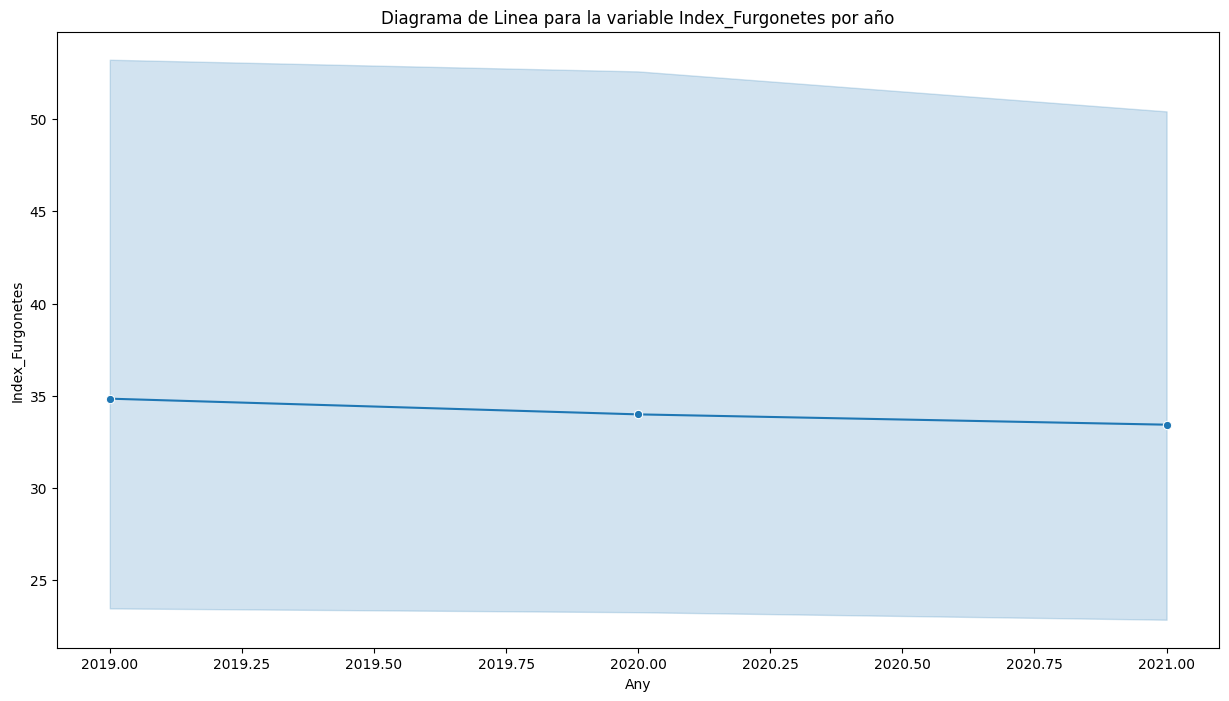

In [63]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_anyFurgonetes, x='Any', y='Index_Furgonetes', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Index_Furgonetes por año')
plt.xlabel('Any')
plt.ylabel('Index_Furgonetes')

plt.show()

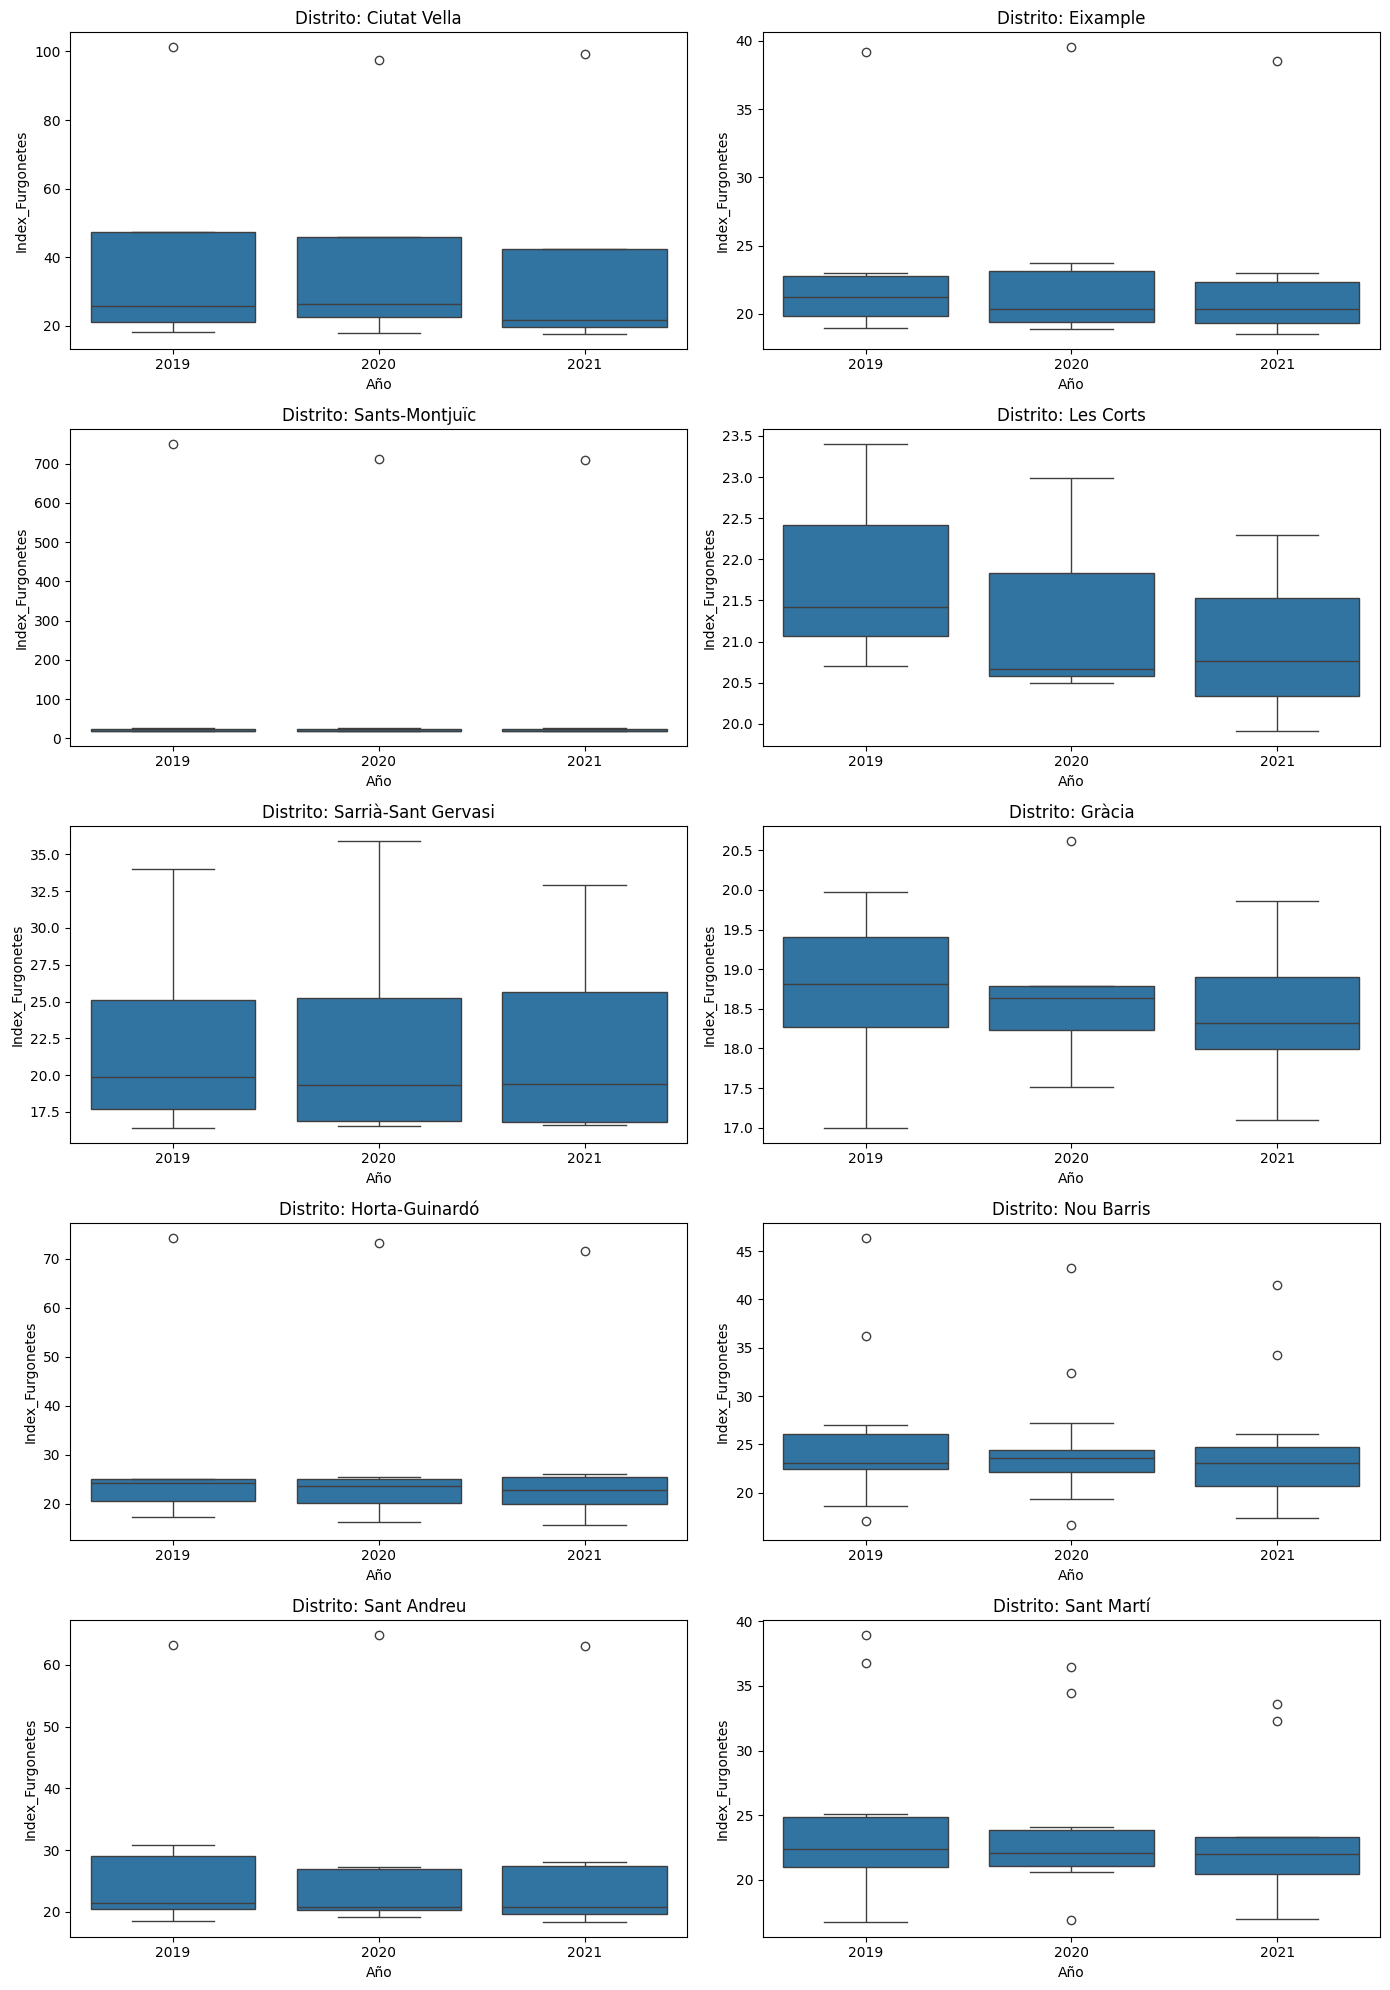

In [64]:
# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(14,20))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_indexAgrup['Nom_Districte'].unique(), start=1):
    plt.subplot(5, 2, i)
    subset = df_indexAgrup[df_indexAgrup['Nom_Districte'] == category]

    # Crear un boxplot para cada subconjunto de datos
    sns.boxplot(x='Any', y='Index_Furgonetes', data=subset, ax=plt.gca())
    plt.title(f'Distrito: {category}')
    plt.xlabel('Año')
    plt.ylabel('Index_Furgonetes')

plt.tight_layout()
plt.show()

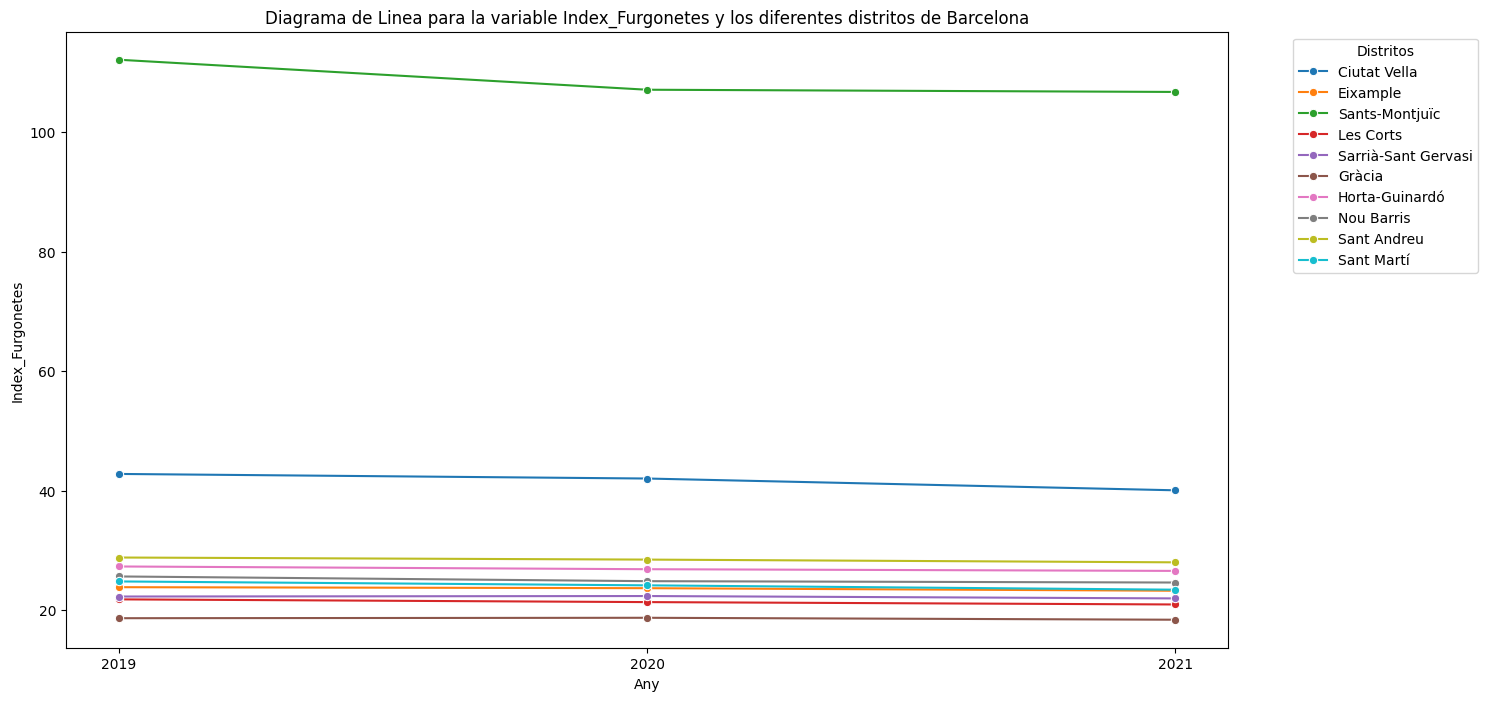

In [65]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_anyFurgonetes, x='Any', y='Index_Furgonetes', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Index_Furgonetes y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Index_Furgonetes')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_indexAgrup['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [49]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
barcelona_distritos.head()


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [50]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

In [51]:
# Mostramos la nomenclatura para los graficos posteriores
print (df_anyTurismes[['Codi_Districte', 'Nom_Districte']].drop_duplicates().to_string(index=False))

 Codi_Districte       Nom_Districte
              1        Ciutat Vella
              2            Eixample
              3      Sants-Montjuïc
              4           Les Corts
              5 Sarrià-Sant Gervasi
              6              Gràcia
              7      Horta-Guinardó
              8          Nou Barris
              9         Sant Andreu
             10          Sant Martí


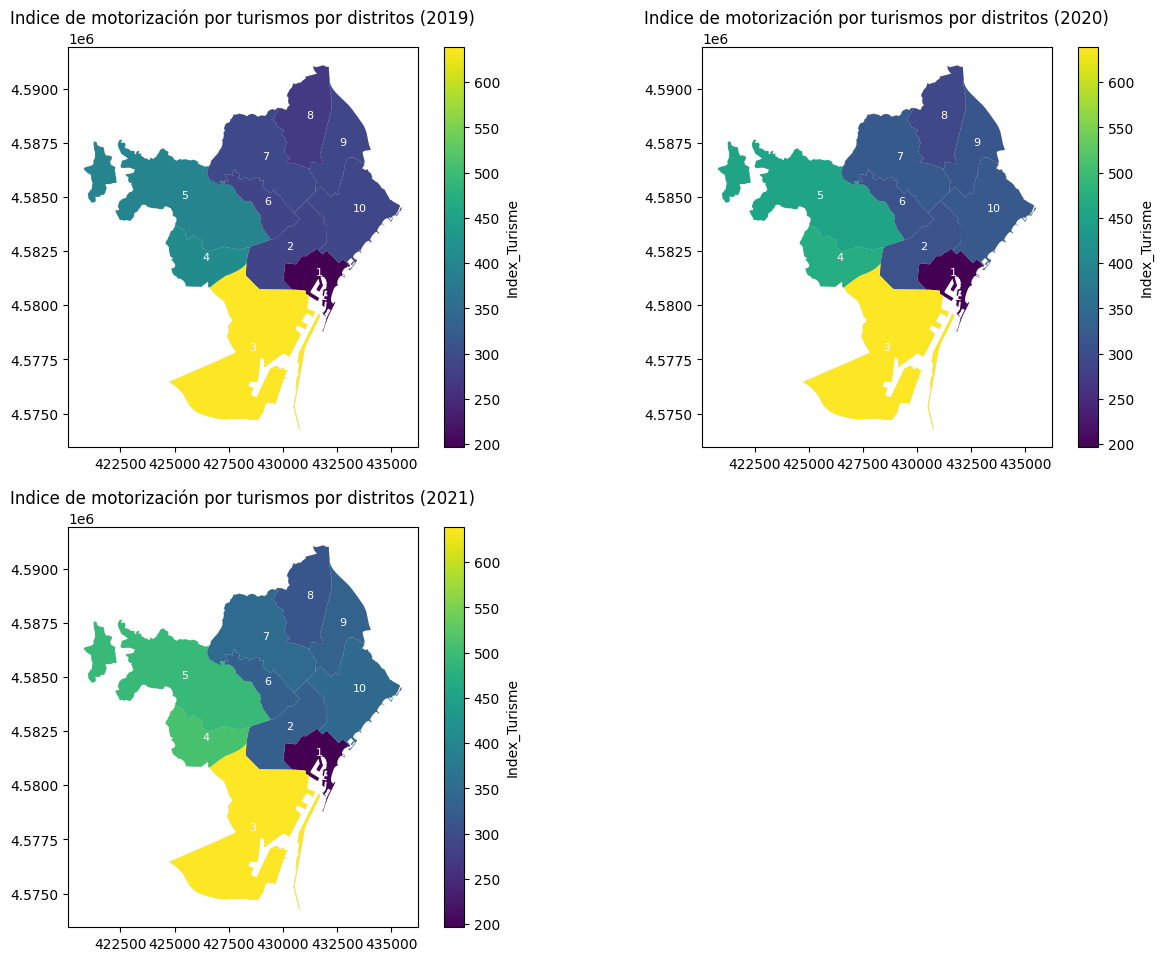

In [52]:
xmin = min(df_anyTurismes['Index_Turisme'])
xmax = max(df_anyTurismes['Index_Turisme'])

# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(15, 80))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_anyTurismes['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    subset = df_anyTurismes[df_anyTurismes['Any'] == category]  # Filtrar datos para la categoría actual
    barcelona_distritos.plot(color='lightgrey',ax=plt.gca())  # Graficar el Shapefile
    merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Trazar el GeoDataFrame con un gradiente de color
    cmap = 'viridis'  # Selecciona el mapa de color
    norm = Normalize(vmin=xmin, vmax=xmax)
    sm = ScalarMappable(cmap=cmap, norm=norm)

    merged_data.plot(ax=plt.gca(), column='Index_Turisme', cmap='viridis', legend=False)  # Graficar los datos combinados

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8,color='white')

    # Configuraciones adicionales
    plt.title('Indice de motorización por turismos por distritos (' + str(category) +')' )

    # Establecer los límites de la leyenda
    sm.set_clim(xmin, xmax)

    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Index_Turisme')  # Establece el nombre de la variable


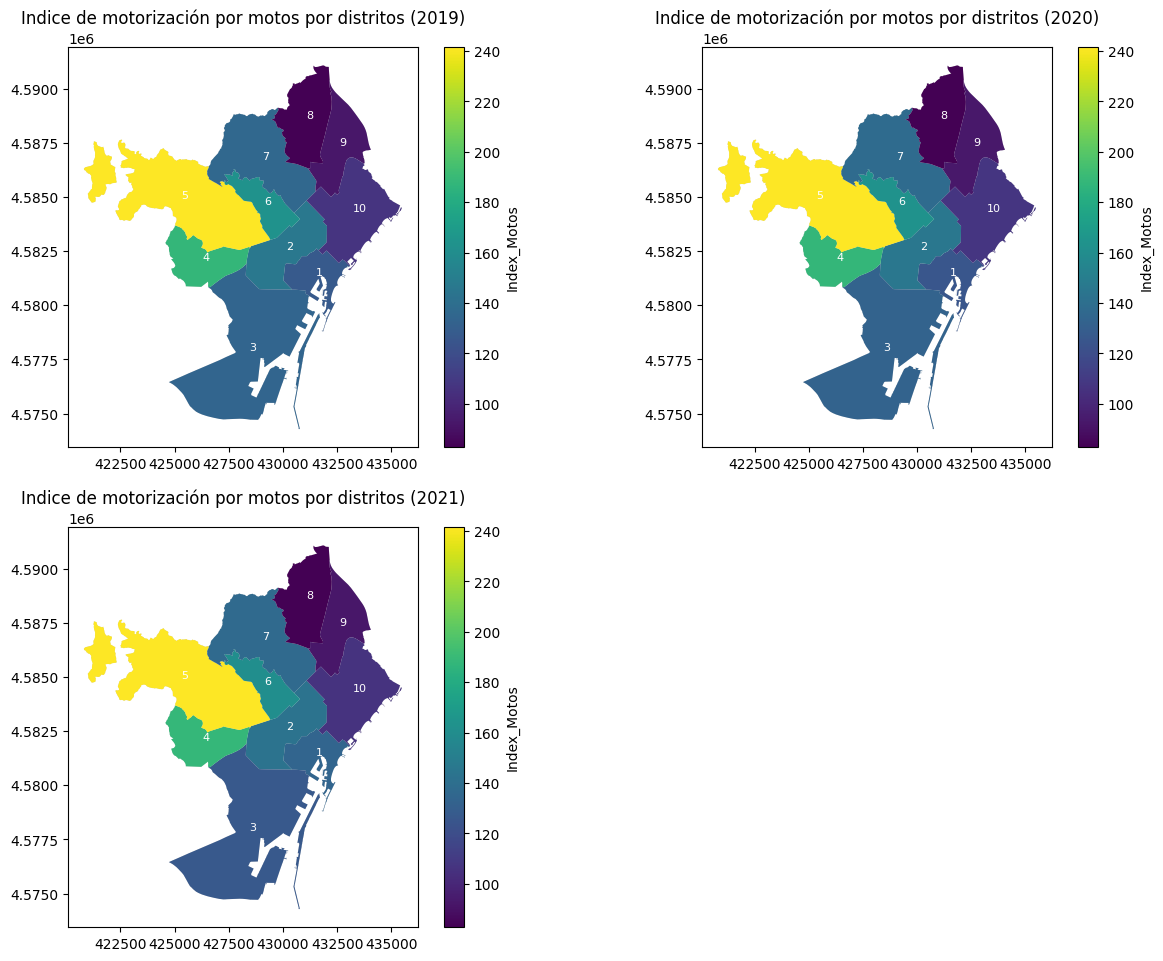

In [59]:
xmin = min(df_anyMotos['Index_Motos'])
xmax = max(df_anyMotos['Index_Motos'])

# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(15, 80))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_anyMotos['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    subset = df_anyMotos[df_anyMotos['Any'] == category]  # Filtrar datos para la categoría actual
    barcelona_distritos.plot(color='lightgrey',ax=plt.gca())  # Graficar el Shapefile
    merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Trazar el GeoDataFrame con un gradiente de color
    cmap = 'viridis'  # Selecciona el mapa de color
    norm = Normalize(vmin=xmin, vmax=xmax)
    sm = ScalarMappable(cmap=cmap, norm=norm)

    merged_data.plot(ax=plt.gca(), column='Index_Motos', cmap='viridis', legend=False)  # Graficar los datos combinados

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8,color='white')

    # Configuraciones adicionales
    plt.title('Indice de motorización por motos por distritos (' + str(category) +')' )

    # Establecer los límites de la leyenda
    sm.set_clim(xmin, xmax)

    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Index_Motos')  # Establece el nombre de la variable


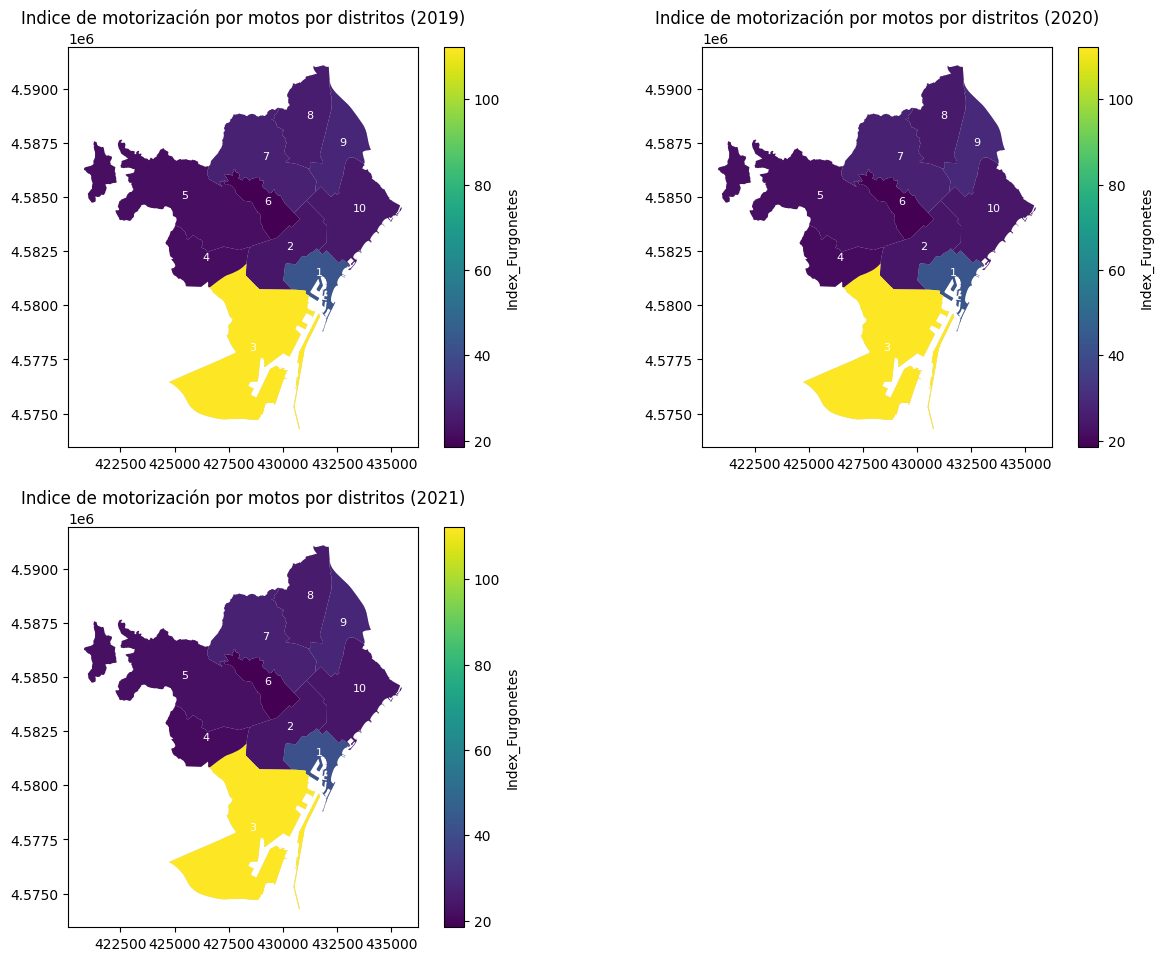

In [66]:
xmin = min(df_anyFurgonetes['Index_Furgonetes'])
xmax = max(df_anyFurgonetes['Index_Furgonetes'])

# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(15, 80))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_anyMotos['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    subset = df_anyFurgonetes[df_anyFurgonetes['Any'] == category]  # Filtrar datos para la categoría actual
    barcelona_distritos.plot(color='lightgrey',ax=plt.gca())  # Graficar el Shapefile
    merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Trazar el GeoDataFrame con un gradiente de color
    cmap = 'viridis'  # Selecciona el mapa de color
    norm = Normalize(vmin=xmin, vmax=xmax)
    sm = ScalarMappable(cmap=cmap, norm=norm)

    merged_data.plot(ax=plt.gca(), column='Index_Furgonetes', cmap='viridis', legend=False)  # Graficar los datos combinados

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8,color='white')

    # Configuraciones adicionales
    plt.title('Indice de motorización por motos por distritos (' + str(category) +')' )

    # Establecer los límites de la leyenda
    sm.set_clim(xmin, xmax)

    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Index_Furgonetes')  # Establece el nombre de la variable
